## Section 2

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
preData = pd.read_csv("german_credit_data.csv", low_memory=False, index_col = 0)
print(preData)

     Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576   

     Duration              

In [3]:
a = preData.groupby("Sex")["Risk"]
a.count()

Sex
female    310
male      690
Name: Risk, dtype: int64

In [4]:
fg = preData.query("Sex == 'female' and Risk == 'good'")
fb = preData.query("Sex == 'female' and Risk == 'bad'")
mg = preData.query("Sex == 'male' and Risk == 'good'")
mb = preData.query("Sex == 'male' and Risk == 'bad'")

ft = preData.query("Sex == 'female'")
mt = preData.query("Sex == 'male'")

nfg = len(fg)
nfb = len(fb)
nmg = len(mg)
nmb = len(mb)

nft = len(fg) + len(fb)
nmt = len(mg) + len(mb)

#print(nft)
#print(nmt)

print(nfg / nft)
print(nmg / nmt)

0.6483870967741936
0.7231884057971014


In [5]:
ft.describe()

,Age,Job,Credit amount,Duration
count,310.000000,310.000000,310.000000,310.000000
mean,32.803226,1.835484,2877.774194,19.438710
std,11.754363,0.674572,2603.141613,11.048047
min,19.000000,0.000000,250.000000,4.000000
25%,24.000000,2.000000,1247.500000,12.000000
50%,29.000000,2.000000,1959.000000,18.000000
75%,37.000000,2.000000,3606.500000,24.000000
max,75.000000,3.000000,18424.000000,60.000000


In [6]:
mt.describe()

,Age,Job,Credit amount,Duration
count,690.000000,690.000000,690.000000,690.000000
mean,36.778261,1.934783,3448.040580,21.560870
std,10.988784,0.642095,2900.483807,12.437941
min,20.000000,0.000000,276.000000,4.000000
25%,28.000000,2.000000,1442.500000,12.000000
50%,35.000000,2.000000,2443.500000,18.000000
75%,43.000000,2.000000,4266.250000,27.000000
max,75.000000,3.000000,15945.000000,72.000000


## Section 3

### Data Preperation

In [7]:
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import random
#from sklearn.naive_bayes import MultinomialNB

In [8]:
preData.fillna("none")

#Age
ageList = preData["Age"]

#Sex
SLE = preprocessing.LabelEncoder()
SLE.fit(preData["Sex"])
sexList = SLE.transform(preData["Sex"])

#Job
jobList = preData["Job"]

#Housing
HLE = preprocessing.LabelEncoder()
HLE.fit(preData["Housing"])
houseList = HLE.transform(preData["Housing"])

#Saving
SaLE = preprocessing.LabelEncoder()
SaLE.fit(preData["Saving accounts"])
saveList = SaLE.transform(preData["Saving accounts"])

#Checking
CLE = preprocessing.LabelEncoder()
CLE.fit(preData["Checking account"])
checkList = CLE.transform(preData["Checking account"])

#Credit
credList = preData["Credit amount"]

#Duration
durList = preData["Duration"]

#Purpose
PLE = preprocessing.LabelEncoder()
PLE.fit(preData["Purpose"])
purList = PLE.transform(preData["Purpose"])

#Combine
data = list(zip(ageList, sexList, jobList, houseList, saveList, checkList, credList, durList, purList))

In [9]:
RLE = preprocessing.LabelEncoder()
RLE.fit(preData["Risk"])
riskList = RLE.transform(preData["Risk"])

### Part 1

In [10]:
dataTrain, dataTest, outTrain, outTest = train_test_split(data, riskList, test_size = .3)

In [11]:
biased1 = LinearSVC(dual = False)
#biased1 = MultinomialNB()

In [12]:
biased1.fit(dataTrain, outTrain)

LinearSVC(dual=False)

In [13]:
score = biased1.score(dataTrain, outTrain)
print(score)

0.76


In [14]:
score = biased1.score(dataTest, outTest)
print(score)

0.7133333333333334


#### Testing for Bias

In [15]:
print(biased1.predict([[19, 0, 1, 1, 1, 1, 1400, 9, 1]]))

[1]


In [16]:
Male = []
Female = []

for ageV in range(19, 76, 5):
    for jobV in range(0, 4):
        for houseV in range(0, 3):
            for saveV in range(0, 5):
                for checkV in range(0, 4):
                    for credV in range(250, 18454, 250):
                        for durV in range(6, 72, 5):
                            for purV in range(0, 8):
                                Male.append([ageV, 1, jobV, houseV, saveV, checkV, credV, durV, purV])
                                Female.append([ageV, 0, jobV, houseV, saveV, checkV, credV, durV, purV])

In [17]:
mResults = biased1.predict(Male)
fResults = biased1.predict(Female)

In [172]:
biased1ResultPercentageMale = ((mResults == 1).sum())/ len(mResults)
biased1ResultPercentageFemale = ((fResults == 1).sum())/ len(fResults)
print(biased1ResultPercentageMale)
print(biased1ResultPercentageFemale)

0.7212882980675147
0.53448941006197


### Part 2

In [235]:
fList = []
fRes = []
mList = []
mRes = []

dataTrain = []
outTrain = []
dataTest = []
outTest = []

for i in range(0, len(data)):
    if (data[i][1] == 0):
        fList.append(data[i])
        fRes.append(riskList[i])
    elif (data[i][1] == 1):
        mList.append(data[i])
        mRes.append(riskList[i])

In [236]:
data2 = []
out2 = []

Nos = random.sample(range(1, len(mList)), len(fList))

for x in range(0, len(mList)):
    if x in Nos:
        data2.append(mList[x])
        out2.append(mRes[x])
        
        
data2 = data2 + fList
out2 = out2 + fRes

In [237]:
dataTrain, dataTest, outTrain, outTest = train_test_split(data2, out2, test_size = .3, )

In [238]:
biased2 = LinearSVC(dual = False)

In [239]:
biased2.fit(dataTrain, outTrain)

LinearSVC(dual=False)

In [240]:
score = biased2.score(dataTrain, outTrain)
print(score)

0.7327188940092166


In [241]:
score = biased2.score(dataTest, outTest)
print(score)

0.6935483870967742


#### Testing for Bias

In [242]:
mResults2 = biased2.predict(Male)
fResults2 = biased2.predict(Female)

In [243]:
biased2ResultPercentageMale = ((mResults2 == 1).sum())/ len(mResults2)
biased2ResultPercentageFemale = ((fResults2 == 1).sum())/ len(fResults2)
print(biased2ResultPercentageMale)
print(biased2ResultPercentageFemale)

0.756065644365623
0.7140566818194173


## Section 4

In [142]:
fgList = []
fbList = []
mgList = []
mbList = []

dataTrain = []
outTrain = []
dataTest = []
outTest = []

for i in range(0, len(data)):
    if (data[i][1] == 0) and riskList[i] == 1:
        fgList.append(data[i])
    elif (data[i][1] == 0) and riskList[i] == 0:
        fbList.append(data[i])
    elif (data[i][1] == 1) and riskList[i] == 1:
        mgList.append(data[i])
    elif (data[i][1] == 1) and riskList[i] == 0:
        mbList.append(data[i])
        
print(len(fgList))
print(len(fbList))
print(len(mgList))
print(len(mbList))

201
109
499
191


In [143]:
successRate = (riskList == 1).sum()/len(data)
print(successRate)

0.7


In [159]:
t = int(len(fgList) * 0.7)
fgNos = random.sample(range(1, len(fgList)), t)
print(len(fgNos))
for x in range(0, len(fgList)):
    if x in fgNos:
        dataTrain.append(fgList[x])
        outTrain.append(1)
        dataTrain.append(fgList[x])
        outTrain.append(1)
    else:
        dataTest.append(fgList[x])
        outTest.append(1)
        dataTest.append(fgList[x])
        outTest.append(1)
        
        
k = int((len(fgList) + len(fbList)) * (1 - successRate))
#fbList = random.sample(fbList, k)

fbNos = random.sample(range(1, len(fbList)), int(k * 0.7))
print(len(fbNos))
for x in range(0, len(fbList)):
    if x in fbNos:
        dataTrain.append(fbList[x])
        outTrain.append(0)
    else:
        dataTest.append(fbList[x])
        outTest.append(0)

140
65


In [160]:
t = int(len(mbList) * 0.7)
mbNos = random.sample(range(1, len(mbList)), t)
print(len(mbNos))
for x in range(0, len(mbList)):
    if x in mbNos:
        dataTrain.append(mbList[x])
        outTrain.append(0)
    else:
        dataTest.append(mbList[x])
        outTest.append(0)
        
        
k = int((len(mgList) + len(mbList)) * (successRate))
#fbList = random.sample(fbList, k)

mgNos = random.sample(range(1, len(mgList)), int(k * 0.7))
print(len(mgNos))
for x in range(0, len(mgList)):
    if x in mgNos:
        dataTrain.append(mgList[x])
        outTrain.append(1)
    else:
        dataTest.append(mgList[x])
        outTest.append(1)

133
337


In [161]:
unbiased = LinearSVC(dual = False)

In [162]:
unbiased.fit(dataTrain, outTrain)

LinearSVC(dual=False)

In [163]:
score = unbiased.score(dataTrain, outTrain)
print(score)

0.7457227138643068


In [164]:
score = unbiased.score(dataTest, outTest)
print(score)

0.7328431372549019


#### Testing for Bias

In [244]:
mResults3 = unbiased.predict(Male)
fResults3 = unbiased.predict(Female)

In [245]:
unbiasedResultPercentageMale = ((mResults3 == 1).sum())/ len(mResults3)
unbiasedResultPercentageFemale = ((fResults3 == 1).sum())/ len(fResults3)
print(unbiasedResultPercentageMale)
print(unbiasedResultPercentageFemale)

0.731527149244401
0.7276308793351816


## Results

In [246]:
resultsTemp = {'Model': ["Biased1", "Biased1", "Biased2", "Biased2", "Unbiased", "Unbiased"], 'Success rate': [biased1ResultPercentageMale, biased1ResultPercentageFemale, biased2ResultPercentageMale, biased2ResultPercentageFemale, unbiasedResultPercentageMale, unbiasedResultPercentageFemale], 'Sex': ["Male", "Female", "Male", "Female", "Male", "Female"]}

results = pd.DataFrame(data=resultsTemp)
print(results)

      Model  Success rate     Sex
0   Biased1      0.721288    Male
1   Biased1      0.534489  Female
2   Biased2      0.756066    Male
3   Biased2      0.714057  Female
4  Unbiased      0.731527    Male
5  Unbiased      0.727631  Female


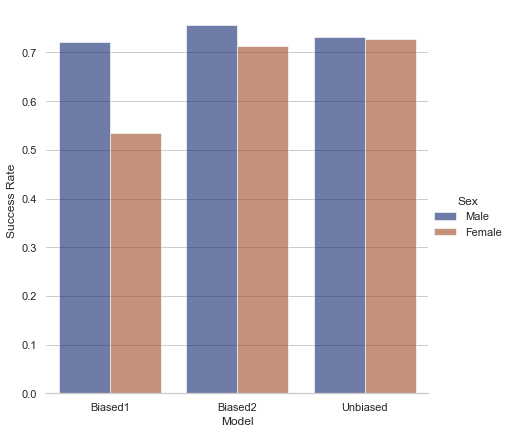

In [247]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=results, kind="bar",
    x="Model", y="Success rate", hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Model", "Success Rate")
g.legend.set_title("Sex")


In [252]:
g.savefig("output.png")

In [248]:
resultsTemp = {'Model': ["Biased1", "Biased2", "Unbiased"], 'Success rate': [biased1ResultPercentageMale - biased1ResultPercentageFemale, biased2ResultPercentageMale - biased2ResultPercentageFemale, unbiasedResultPercentageMale - unbiasedResultPercentageFemale]}

resultsB = pd.DataFrame(data=resultsTemp)
print(resultsB)

      Model  Success rate
0   Biased1      0.186799
1   Biased2      0.042009
2  Unbiased      0.003896


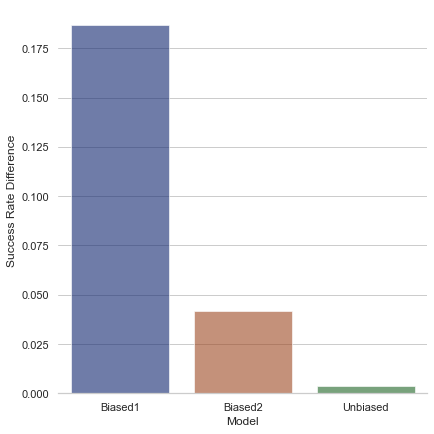

In [255]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=resultsB, kind="bar",
    x="Model", y="Success rate",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Model", "Success Rate Difference")

In [256]:
g.savefig("output2.png")